<h1 style="color:blue"><center>Introduction To Data Science</center></h1>

<h3 style="color:black"><center> New York Citi Bike Trips </center></h3>
<br>
<p>Data Set : https://s3.amazonaws.com/tripdata/index.html </p>

Citi Bike is a bike sharing service available in New York City, that permits easy and affordable bike trips. They regularly release data about such trips, including starting and ending stations, starting and ending time, duration of the trip and few others variables. 

Let's take a look at our data!

  What is the question?
 * If Citi bike as a company were to expand in order to manage high traffic areas - what locations would they consider adding more docks or resources?
 We analyzed loads (inflow/docking V/s outflow/Undocking We created labels such 
 * How can they improve services for their customers on weekday v/s weekend based on traffic and usage?
 * Regress to a predicted value of number of bikes needed in high demand areas? 
 
Why should anyone care?
* Primarily, helps **Citi Bike** as a company to get perspective as to how they can improve their services and generate more revenue.
* These insights can also help regular **Citi Bike users**.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np

In [2]:
citi_data = pd.read_csv('./citi_bike_aug.csv') #Importing data into a DataFrame
citi_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


We seem to have some null values in the data.

In [3]:
citi_data.shape #looking at the dimenstions

(1977177, 15)

### Data Cleaning and Preprocessing

In [4]:
#Setting column names for convenience
column_names = {"start station id":"origin_id","start station name":"origin",
                                     "start station latitude":"origin_latitude",
                                     "start station longitude":"origin_longitude","end station id":"dest_id",
                                    "end station latitude":"dest_latitude","end station name":"destination",
                                    "end station longitude":"dest_longitude", "birth year":"birth_year"}

In [5]:
#Renaming column names 
citi_data.rename(index = str, columns = column_names, inplace = True)
citi_data.tail()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
1977172,592,2018-08-31 23:59:27.6530,2018-09-01 00:09:20.5800,2003.0,1 Ave & E 18 St,40.733812,-73.980544,518.0,E 39 St & 2 Ave,40.747804,-73.973442,33086,Subscriber,1996,1
1977173,451,2018-08-31 23:59:42.8400,2018-09-01 00:07:14.5330,249.0,Harrison St & Hudson St,40.718710,-74.009001,2008.0,Little West St & 1 Pl,40.705693,-74.016777,33066,Subscriber,1960,1
1977174,472,2018-08-31 23:59:48.5310,2018-09-01 00:07:41.0410,450.0,W 49 St & 8 Ave,40.762272,-73.987882,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,28711,Subscriber,1966,1
1977175,1239,2018-08-31 23:59:50.7620,2018-09-01 00:20:30.4570,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,372.0,Franklin Ave & Myrtle Ave,40.694546,-73.958014,33935,Subscriber,1984,1
1977176,738,2018-08-31 23:59:55.7330,2018-09-01 00:12:14.0300,504.0,1 Ave & E 16 St,40.732219,-73.981656,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,28440,Subscriber,1970,1


#### Investigating Null Values

In [6]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id            True
origin               True
origin_latitude     False
origin_longitude    False
dest_id              True
destination          True
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
dtype: bool

In [7]:
citi_data[citi_data.origin_id.isnull()]

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1
879953,3471,2018-08-15 12:53:40.8170,2018-08-15 13:51:32.0090,NaN,NaN,40.857,-73.890,NaN,NaN,40.845,-73.896,34501,Subscriber,1993,1
880009,3108,2018-08-15 12:54:48.0290,2018-08-15 13:46:36.7560,NaN,NaN,40.854,-73.890,NaN,NaN,40.845,-73.893,34518,Subscriber,1989,2
883455,1738,2018-08-15 13:58:46.2120,2018-08-15 14:27:45.1730,NaN,NaN,40.845,-73.893,NaN,NaN,40.839,-73.878,34518,Subscriber,1989,2
883515,644,2018-08-15 13:59:50.3310,2018-08-15 14:10:34.8660,NaN,NaN,40.845,-73.893,NaN,NaN,40.842,-73.884,34501,Subscriber,1993,1
884650,443,2018-08-15 14:20:31.5860,2018-08-15 14:27:54.9440,NaN,NaN,40.842,-73.884,NaN,NaN,40.839,-73.878,34501,Subscriber,1993,1


In [72]:
null_citi = pd.DataFrame(citi_data[citi_data['origin'].isnull()])
null_citi
citi_data.dropna(axis=0,inplace=True)
citi_data.shape


(1755924, 33)

In [74]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id           False
origin              False
origin_latitude     False
origin_longitude    False
dest_id             False
destination         False
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
start_date          False
start_time          False
stop_date           False
stop_time           False
Start_hour          False
Start_Dayofweek     False
Start_Day           False
Start_Minute        False
Start_Week          False
Start_weekday       False
Stop_hour           False
Stop_Dayofweek      False
Stop_Day            False
Stop_Minute         False
Stop_Week           False
Stop_weekday        False
age                 False
Distance            False
dtype: bool

In [75]:
print(np.unique(null_citi[['origin_latitude', 'origin_longitude']].values))
print(np.unique(null_citi[['dest_latitude', 'dest_longitude']].values))

[]
[]


The same bunch of locations at origin and destination - could be a result of failure of some system at the docking station for these locations? 

In [76]:
null_citi.groupby(['origin_longitude','origin_latitude','dest_latitude','dest_longitude']).size()

Series([], dtype: int64)

So many combinations, must mean a bunch of paths are affected, wherein the origin anddestination was failed to be recorded. Let's leave this aside for now. 


Let's now take a look at the summary of the data.

In [77]:
citi_data.describe()

,tripduration,origin_id,origin_latitude,origin_longitude,dest_id,dest_latitude,dest_longitude,bikeid,birth_year,gender,...,Start_Minute,Start_Week,Start_weekday,Stop_hour,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
count,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,...,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06,1.755924e+06
mean,9.047428e+02,1.614236e+03,4.073703e+01,-7.398242e+01,1.609231e+03,4.073668e+01,-7.398255e+01,2.628837e+04,1.981006e+03,1.268401e+00,...,2.948239e+01,3.305804e+01,2.834375e+00,1.415263e+01,1.624037e+01,2.981861e+01,3.305853e+01,2.835202e+00,3.699440e+01,1.831653e+00
std,9.866440e+03,1.449241e+03,3.050529e-02,1.955262e-02,1.449533e+03,3.036408e-02,1.967180e-02,6.208705e+03,1.128078e+01,4.431273e-01,...,1.726440e+01,1.324001e+00,1.830922e+00,5.046212e+00,9.000651e+00,1.740990e+01,1.324083e+00,1.831528e+00,1.128078e+01,1.478032e+00
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406378e+01,1.452900e+04,1.948000e+03,1.000000e+00,...,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,1.600000e+01,0.000000e+00
25%,3.600000e+02,3.820000e+02,4.071755e+01,-7.399530e+01,3.820000e+02,4.071755e+01,-7.399596e+01,2.008300e+04,1.974000e+03,1.000000e+00,...,1.400000e+01,3.200000e+01,1.000000e+00,1.000000e+01,8.000000e+00,1.500000e+01,3.200000e+01,1.000000e+00,2.800000e+01,8.314410e-01
50%,6.010000e+02,5.090000e+02,4.073756e+01,-7.398565e+01,5.080000e+02,4.073705e+01,-7.398602e+01,2.784100e+04,1.984000e+03,1.000000e+00,...,2.900000e+01,3.300000e+01,3.000000e+00,1.500000e+01,1.600000e+01,3.000000e+01,3.300000e+01,3.000000e+00,3.400000e+01,1.389319e+00
75%,1.035000e+03,3.258000e+03,4.075725e+01,-7.397189e+01,3.259000e+03,4.075669e+01,-7.397208e+01,3.155300e+04,1.990000e+03,2.000000e+00,...,4.400000e+01,3.400000e+01,4.000000e+00,1.800000e+01,2.400000e+01,4.500000e+01,3.400000e+01,4.000000e+00,4.400000e+01,2.362702e+00
max,3.076381e+06,3.705000e+03,4.081439e+01,-7.390774e+01,3.705000e+03,4.081439e+01,-7.390774e+01,3.483900e+04,2.002000e+03,2.000000e+00,...,5.900000e+01,3.500000e+01,6.000000e+00,2.300000e+01,3.100000e+01,5.900000e+01,3.700000e+01,6.000000e+00,7.000000e+01,1.819242e+01


In [78]:
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
citi_data['starttime'] = pd.to_datetime(citi_data['starttime'], format = '%Y-%m-%d %H:%M:%S.%f')
citi_data['stoptime'] = pd.to_datetime(citi_data['stoptime'],format = ('%Y-%m-%d %H:%M:%S.%f'))

In [79]:
citi_data['start_date'] = [d.date() for d in citi_data['starttime']]
citi_data['start_time'] = [d.time() for d in citi_data['starttime']]

citi_data['stop_date'] = [d.date() for d in citi_data['stoptime']]
citi_data['stop_time'] = [d.time() for d in citi_data['stoptime']]
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,31,2,0,Wednesday,1,11,31,2,32,2.594850
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,31,2,0,Wednesday,1,10,31,2,49,2.164037
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,31,2,0,Wednesday,1,22,31,2,48,1.058240
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,31,2,0,Wednesday,1,4,31,2,36,0.595883
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,31,2,0,Wednesday,1,7,31,2,31,1.096288


In [80]:
#inHour = citi_data[start_time[:2]]

#df['year'] = df['tpep_pickup_datetime'].dt.year
#df['month'] = df['tpep_pickup_datetime'].dt.month
citi_data['Start_hour'] = citi_data['starttime'].dt.hour
citi_data['Start_Dayofweek'] = citi_data['starttime'].dt.weekday_name
citi_data['Start_Day'] = citi_data['starttime'].dt.day
citi_data['Start_Minute'] = citi_data['starttime'].dt.minute
citi_data['Start_Week'] = citi_data['starttime'].dt.week
citi_data['Start_weekday'] = citi_data['starttime'].dt.weekday

citi_data['Stop_hour'] = citi_data['stoptime'].dt.hour
citi_data['Stop_Dayofweek'] = citi_data['stoptime'].dt.weekday_name
citi_data['Stop_Day'] = citi_data['stoptime'].dt.day
citi_data['Stop_Minute'] = citi_data['stoptime'].dt.minute
citi_data['Stop_Week'] = citi_data['stoptime'].dt.week
citi_data['Stop_weekday'] = citi_data['stoptime'].dt.weekday





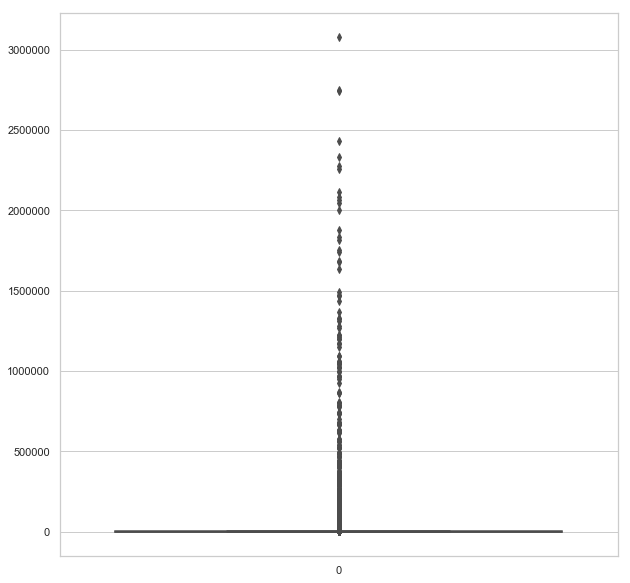

In [81]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,15))
sns.boxplot(data=citi_data['tripduration'])
fig=plt.gcf()
fig.set_size_inches(10,10)


In [82]:
#to find unique gender
citi_data.gender.unique()

array([1, 2])

Notice, how we have some very high values for trip duration and some very low values for trip duration. 

--->High values maybe seen, when someone did not dock their bike. Low values, because someone undocked the bike - did not use it and docked it back.

---> As part of cleaning, we want to get rid of the extremely high values and extremely low values? 

### Data Visualization and Analysis

Monday       222222
Tuesday      246500
Wednesday    317257
Thursday     322425
Friday       292941
Saturday     170580
Sunday       183999
Name: Start_Dayofweek, dtype: int64


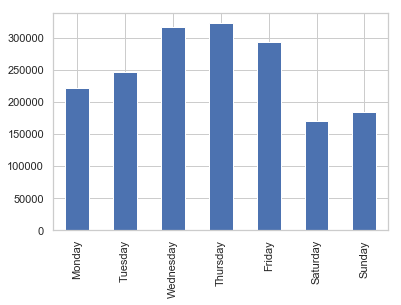

In [83]:
#counting the no of week days:
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_of_rides_weekly=citi_data.Start_Dayofweek.value_counts().reindex(DAYS, fill_value=0)
count_of_rides_weekly.plot(kind='bar')
print(count_of_rides_weekly)

It appears from the above graph, that, The peak usage of Citi bike is Wednesday, Thursday and Friday. Let us also take a look at subscriber/customer usage pattern over the week (counts by day).

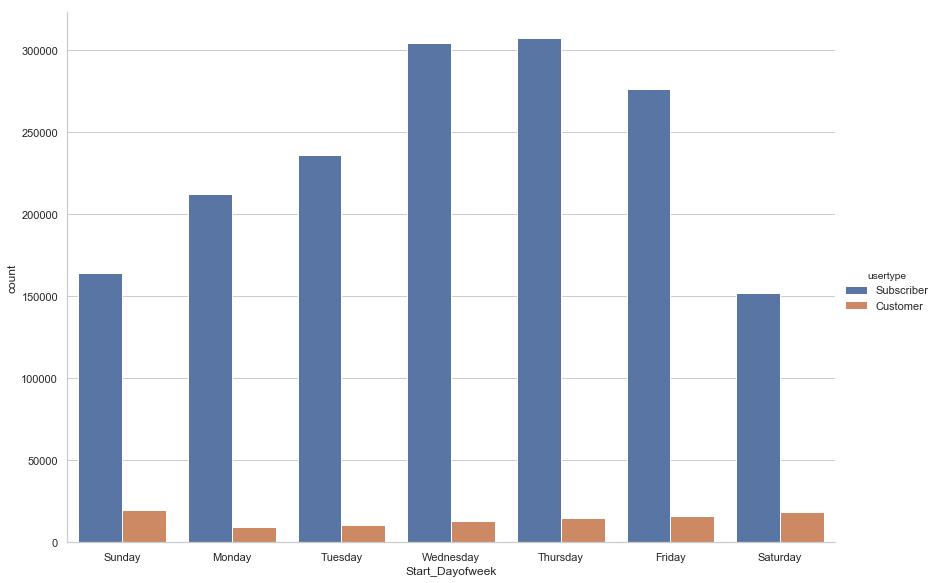

In [84]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
g = sns.catplot("Start_Dayofweek", 
                 hue="usertype",
                 data=citi_data, kind="count",order = order, height=8.27, aspect=11.7/8.27);


As we can see from the above plots, the patterns of usage are different - Customer usage during the weekdays are clearly much lower than their usage in the weekend. 

We do imagine New York has visitors over the weekend and we can henceforth see that pattern here as well. 

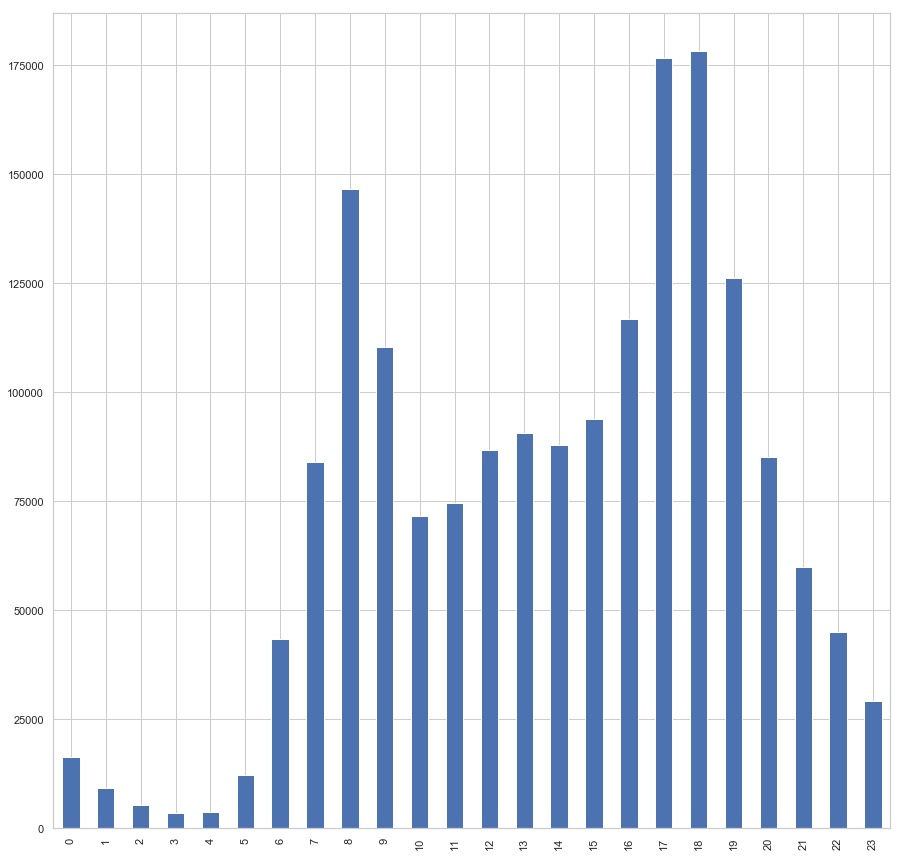

In [85]:
#Counting riders hourly
day=range(0,24)
count_of_rides_hourly = citi_data['Start_hour'].value_counts().reindex(day, fill_value=0)
plt.figure(figsize = (15,15))
count_of_rides_hourly.plot(kind='bar')
#print(count_of_rides_hourly)

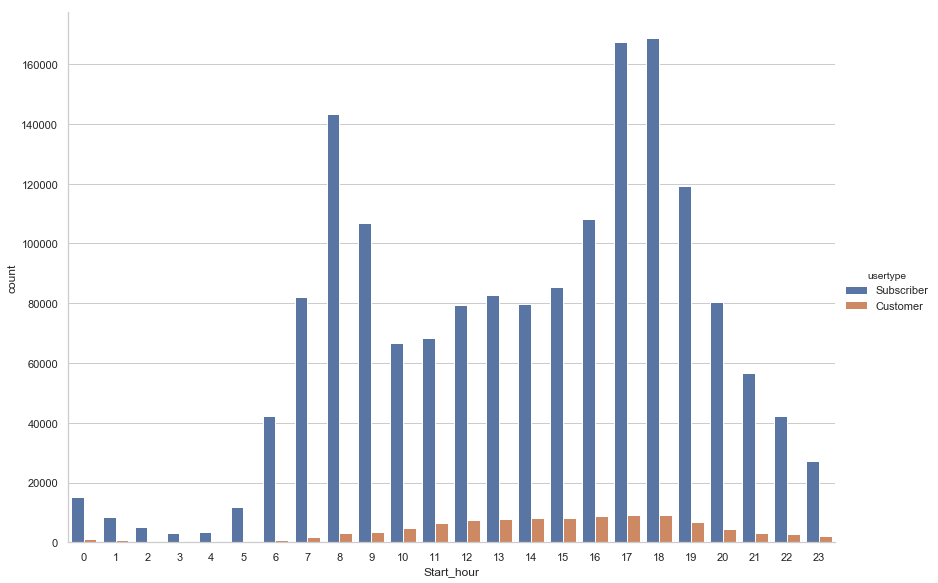

In [86]:
#Counting riders hourly
hour = range(0,24)

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data, kind="count",order = hour, height=8.27, aspect=11.7/8.27);



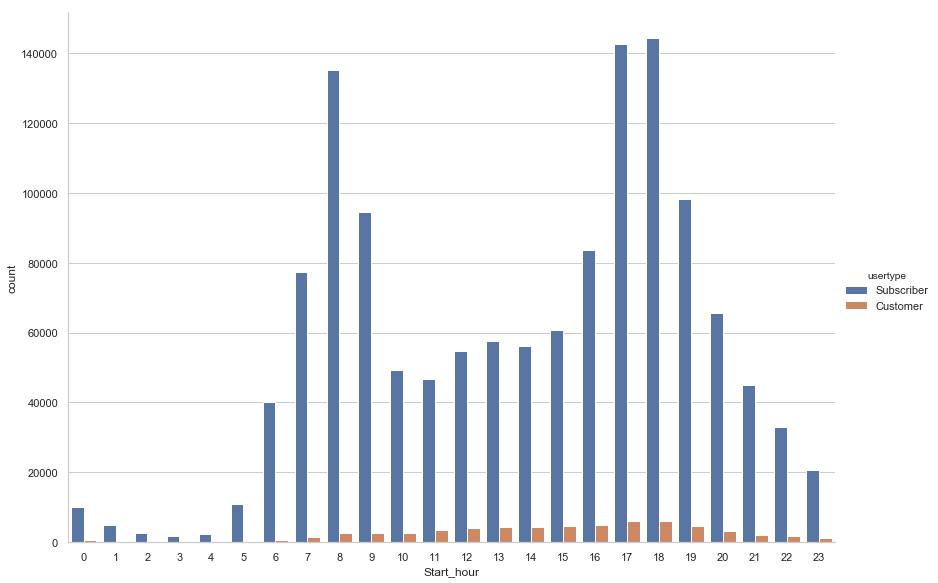

In [87]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday"]



g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekday)], kind="count",order = hour, height=8.27, aspect=11.7/8.27);




We can see a pattern of usage for subscribers on weekdays - peaking at about and around 8 am and 5-6 pm. Whereas there seems to be a similar pattern of usage by "Customer" usertype - high usage starting 10-11 am until 6-7 pm on the weekdays.

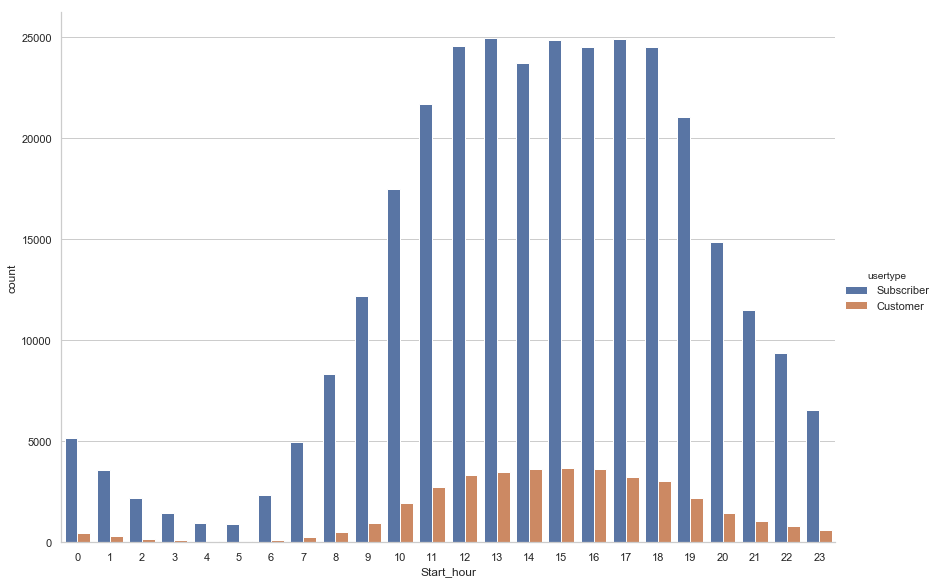

In [88]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekend = ["Saturday","Sunday"]

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekend)], 
                kind="count",order = hour, height=8.27, aspect=11.7/8.27);




The patterns for Weekends are clear from the above plot - For both categories, subscriber and customer, there seems to be high demand between 10 am and 7 pm. Some Subscribers also seem to be touring around New York on weekends. 

Let's try to see the most frequent origin destination pairs.

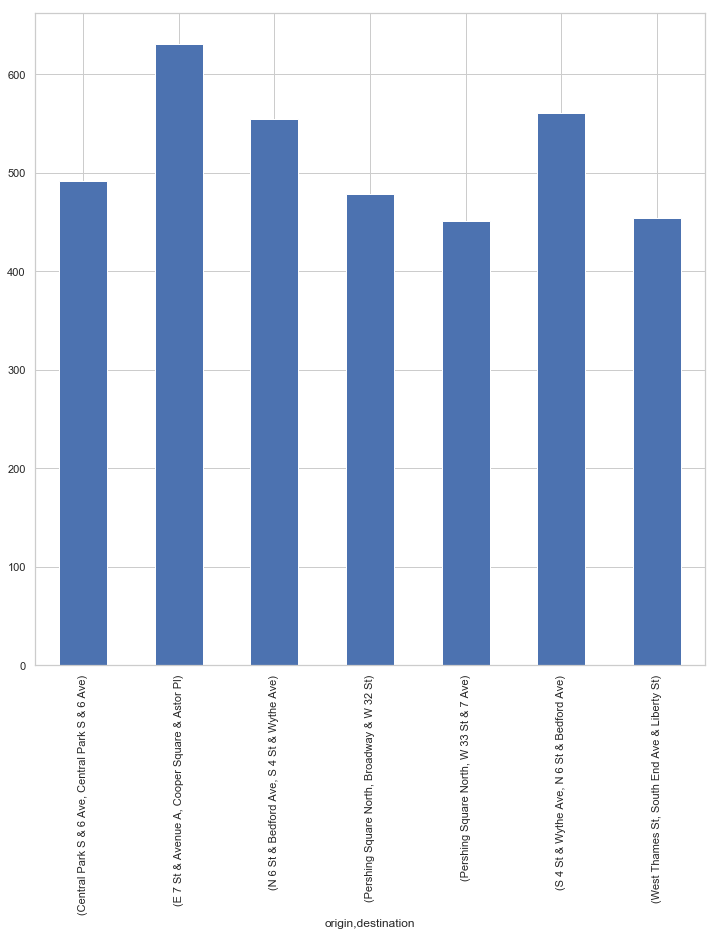

In [89]:
high_origin_dest = citi_data.groupby(['origin','destination']).size()
#print(high_origin_dest)
top_origin_dest = high_origin_dest[high_origin_dest>450]
#print(top_origin_dest)

plt.figure(figsize=(12,12))
top_origin_dest.plot(kind='bar')

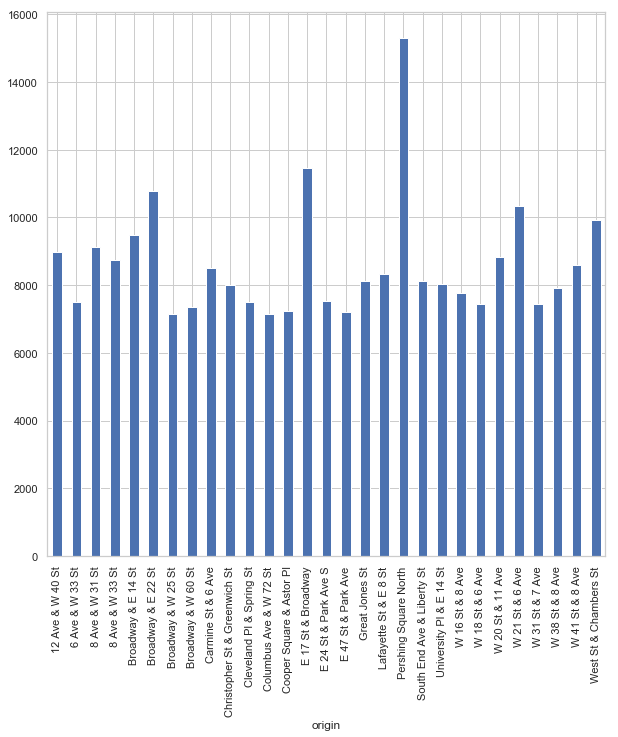

In [90]:
high_origin = citi_data.groupby(['origin']).size()
#print(high_origin)

top_origin = high_origin[high_origin>7000]
#print(top_origin_dest)

plt.figure(figsize=(10,10))
top_origin.plot(kind='bar' )


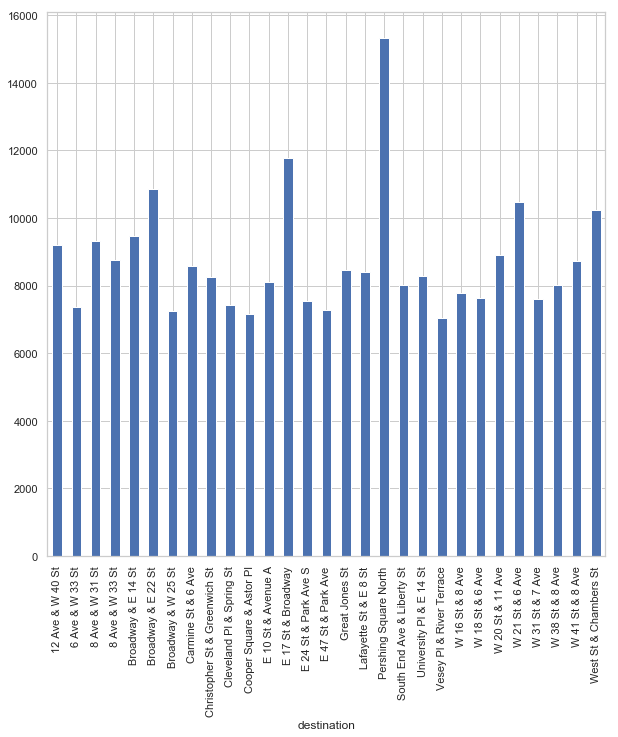

In [91]:
high_dest = citi_data.groupby(['destination']).size()
#print(high_origin)

top_dest = high_dest[high_dest>7000]
#print(top_origin_dest)

plt.figure(figsize=(10,10))
top_dest.plot(kind='bar' )

In [92]:
types_users = citi_data['usertype'].value_counts()

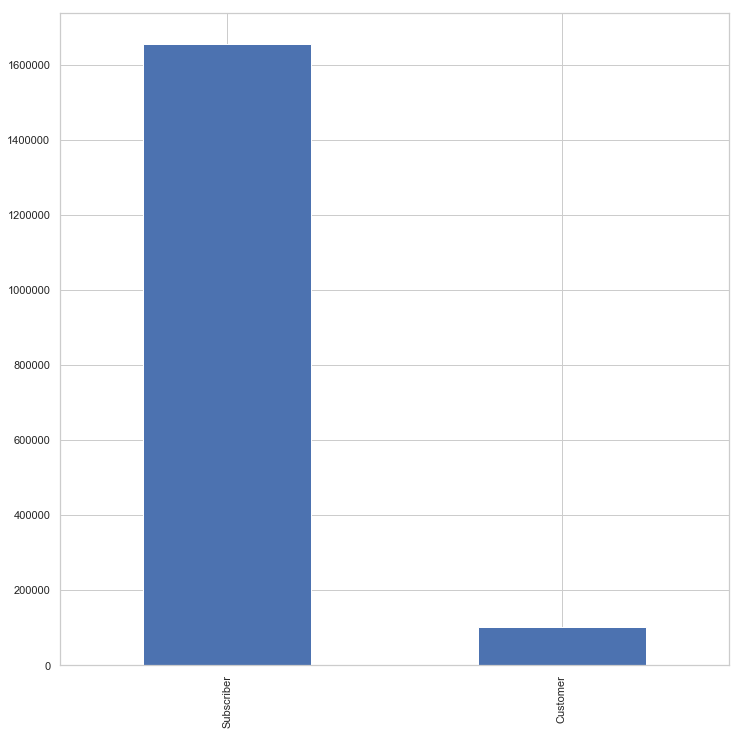

In [93]:
plt.figure(figsize=(12,12))
types_users.plot(kind='bar')

In [94]:
gender_users = citi_data['gender'].value_counts()
gender_users
#plt.figure(figsize=(12,12))
#gender_users.plot(kind='bar')

1    1284633
2     471291
Name: gender, dtype: int64

10% of the gender values are unknown - 0 value Let's drop these values as our further analysis requires gender values for speed analysis. 

In [95]:
citi_data.shape

(1755924, 33)

In [96]:
citi_data.drop(citi_data[citi_data.gender == 0].index,inplace=True) #Dropping unknown gender values
citi_data.shape

(1755924, 33)

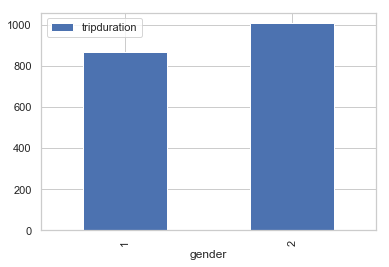

In [97]:
mean_trip_gender = citi_data.groupby('gender', as_index=False)['tripduration'].mean() #finding the average tripduration by gender
mean_trip_gender.plot(x='gender',y='tripduration',kind='bar')

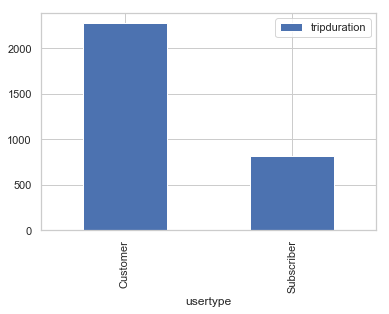

In [98]:
mean_trip_usertype = citi_data.groupby('usertype', as_index = False)['tripduration'].mean()
mean_trip_usertype.plot(x='usertype',y='tripduration',kind='bar')

### Further Analysis to answer questions

Calculating age to see if there are any outliers. 

In [99]:
citi_data['age'] = 2018 - citi_data['birth_year'].astype(int)
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,31,2,0,Wednesday,1,11,31,2,32,2.594850
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,31,2,0,Wednesday,1,10,31,2,49,2.164037
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,31,2,0,Wednesday,1,22,31,2,48,1.058240
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,31,2,0,Wednesday,1,4,31,2,36,0.595883
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,31,2,0,Wednesday,1,7,31,2,31,1.096288


In [100]:
old_people = citi_data.age[citi_data.age>70] #Setting a threshold for age of bike riders and looking at the count
old_people.count()

0

In [101]:
citi_data.drop(citi_data[citi_data.age >70].index,inplace=True) #dropping high age values
citi_data.shape

(1755924, 33)

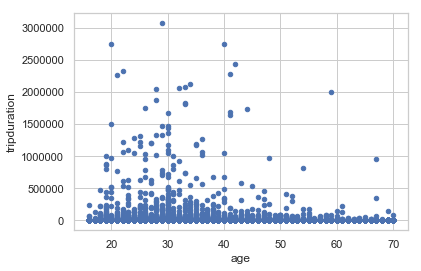

In [102]:
citi_data.plot.scatter('age','tripduration') #Is there a relationship between age and tripduration?

Distance will be a major contributing factor for tripdurations among other explanatory variables and we are going to calculate it as shown below:

In [103]:
from geopy.distance import vincenty
from geopy.distance import great_circle
import math
from haversine import haversine

#usused function:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371/1.609 # miles
#Earth radius is the approximate distance from Earth's center to its surface, about 6,371 km (3,959 mi).
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
       * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

#print(distance(citi_data.iloc[1][['origin_latitude','origin_longitude']],citi_data.iloc[1][['dest_latitude','dest_longitude']]))
#print(great_circle(citi_data.iloc[1][['origin_latitude','origin_longitude']],citi_data.iloc[1][['dest_latitude','dest_longitude']]).miles)

#Calculating distance between origin and destination

dist = []
for i in range(len(citi_data)):
    dist.append(haversine((citi_data['origin_latitude'][i], citi_data['origin_longitude'][i]), (citi_data['dest_latitude'][i], citi_data['dest_longitude'][i])))


#    dist.append(great_circle(citi_data.iloc[i][['origin_latitude','origin_longitude']],citi_data.iloc[i][['dest_latitude','dest_longitude']]).miles)
    


citi_data['Distance'] = dist


In [49]:
citi_data.shape

(1760788, 33)

In [57]:
origin_dest_same = citi_data[(citi_data['origin'] == citi_data['destination'])]
origin_dest_same

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
100,981,2018-08-01 00:09:16.350,2018-08-01 00:25:37.395,513.0,W 56 St & 10 Ave,40.768254,-73.988639,513.0,W 56 St & 10 Ave,40.768254,...,31,2,0,Wednesday,1,25,31,2,61,0.0
116,1161,2018-08-01 00:11:15.029,2018-08-01 00:30:36.353,3175.0,W 70 St & Amsterdam Ave,40.777480,-73.982886,3175.0,W 70 St & Amsterdam Ave,40.777480,...,31,2,0,Wednesday,1,30,31,2,38,0.0
279,949,2018-08-01 00:27:25.353,2018-08-01 00:43:15.214,3351.0,E 102 St & 1 Ave,40.786995,-73.941648,3351.0,E 102 St & 1 Ave,40.786995,...,31,2,0,Wednesday,1,43,31,2,26,0.0
388,2280,2018-08-01 00:38:53.036,2018-08-01 01:16:53.323,146.0,Hudson St & Reade St,40.716250,-74.009106,146.0,Hudson St & Reade St,40.716250,...,31,2,1,Wednesday,1,16,31,2,54,0.0
399,106,2018-08-01 00:40:43.710,2018-08-01 00:42:30.388,324.0,DeKalb Ave & Hudson Ave,40.689888,-73.981013,324.0,DeKalb Ave & Hudson Ave,40.689888,...,31,2,0,Wednesday,1,42,31,2,50,0.0
466,294,2018-08-01 00:52:24.879,2018-08-01 00:57:19.092,3695.0,E 5 St & 2 Ave,40.726870,-73.989190,3695.0,E 5 St & 2 Ave,40.726870,...,31,2,0,Wednesday,1,57,31,2,21,0.0
519,951,2018-08-01 01:00:54.053,2018-08-01 01:16:45.951,340.0,Madison St & Clinton St,40.712690,-73.987763,340.0,Madison St & Clinton St,40.712690,...,31,2,1,Wednesday,1,16,31,2,42,0.0
534,2240,2018-08-01 01:03:34.879,2018-08-01 01:40:55.001,3348.0,Coffey St & Conover St,40.677236,-74.015665,3348.0,Coffey St & Conover St,40.677236,...,31,2,1,Wednesday,1,40,31,2,24,0.0
547,282,2018-08-01 01:08:00.496,2018-08-01 01:12:43.224,3434.0,W 88 St & West End Ave,40.790254,-73.977183,3434.0,W 88 St & West End Ave,40.790254,...,31,2,1,Wednesday,1,12,31,2,30,0.0
642,1568,2018-08-01 01:27:42.236,2018-08-01 01:53:50.506,3244.0,University Pl & E 8 St,40.731437,-73.994903,3244.0,University Pl & E 8 St,40.731437,...,31,2,1,Wednesday,1,53,31,2,61,0.0


In [64]:
#Looking at data that has a calculated distance = 0 
circular = citi_data[(citi_data['Distance']==0.0) & (citi_data['tripduration']<120)]
print(circular.shape)
circular.head()

(3676, 33)


,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
399,106,2018-08-01 00:40:43.710,2018-08-01 00:42:30.388,324.0,DeKalb Ave & Hudson Ave,40.689888,-73.981013,324.0,DeKalb Ave & Hudson Ave,40.689888,...,31,2,0,Wednesday,1,42,31,2,50,0.0
717,113,2018-08-01 01:42:19.442,2018-08-01 01:44:13.242,483.0,E 12 St & 3 Ave,40.732233,-73.988900,483.0,E 12 St & 3 Ave,40.732233,...,31,2,1,Wednesday,1,44,31,2,21,0.0
1946,96,2018-08-01 06:23:18.721,2018-08-01 06:24:55.191,480.0,W 53 St & 10 Ave,40.766697,-73.990617,480.0,W 53 St & 10 Ave,40.766697,...,31,2,6,Wednesday,1,24,31,2,26,0.0
2095,92,2018-08-01 06:30:12.208,2018-08-01 06:31:45.171,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3494.0,E 115 St & Lexington Ave,40.797911,...,31,2,6,Wednesday,1,31,31,2,33,0.0
2206,96,2018-08-01 06:35:04.400,2018-08-01 06:36:40.965,127.0,Barrow St & Hudson St,40.731724,-74.006744,127.0,Barrow St & Hudson St,40.731724,...,31,2,6,Wednesday,1,36,31,2,28,0.0


We do not see any "Circular trips". There are no instances of same origin and destination in the data.

In [68]:
#Dropping the circular trips 
citi_data = citi_data.drop(citi_data.index[(citi_data['Distance'] == 0.0) & (citi_data['tripduration']<120)])
citi_data.shape

(1757112, 33)

In [66]:
citi_data['tripduration'].describe() #statistical summary of tripduration

count    1.760788e+06
mean     9.044436e+02
std      9.866720e+03
min      6.100000e+01
25%      3.590000e+02
50%      5.990000e+02
75%      1.034000e+03
max      3.076381e+06
Name: tripduration, dtype: float64

In [67]:
citi_data['Distance'].describe() #statistical summary of distance

count    1.760788e+06
mean     1.827082e+00
std      1.478732e+00
min      0.000000e+00
25%      8.276678e-01
50%      1.385931e+00
75%      2.357386e+00
max      1.819242e+01
Name: Distance, dtype: float64

In [ ]:
citi_data[(citi_data['tripduration']>=3600)|(citi_data['tripduration']<=120)|(citi_data['Distance']>10)].shape 

In [ ]:
citi_data.drop(citi_data.index[(citi_data['tripduration']>= 3600)|(citi_data['tripduration']<=120)|(citi_data['Distance']>10)],inplace=True)
citi_data.shape

In [ ]:
citi_data.plot.scatter('Distance','tripduration') #Checking if there is any relation between distance and trip duration

There is definitely a pattern between distance and tripduration, but we do not see a very strong relationship.

In [ ]:
citi_data.head()

We will now be computing speed of bike based on the computed distance and time information that we have. We are trying t determine if factors such as gender and age affect the speed of the rider and therefore the tripduration. 

In [ ]:
#Add Minutes column for Trip Duration
citi_data['Minutes'] = citi_data['tripduration']/60
#For Visual purposes, rounded
citi_data['Minutes'] = round(citi_data['Minutes'])
citi_data['Minutes'] = citi_data['Minutes'].astype(int)

In [ ]:
citi_data['min_mile'] = round(citi_data['Minutes']/citi_data['Distance'], 2)
citi_data['mile_hour'] = round(citi_data['Distance']/(citi_data['Minutes']/60),2)

In [ ]:
#Rider performance by age and Gender in Min/Mile 
fig, ax5 = plt.subplots(figsize=(11,5))
citi_data.groupby(['age','gender']).mean()['min_mile'].unstack().plot(ax=ax5, color ="bg")
ax5.legend(['Female','Male'])
plt.ylabel('Average Speed (min/mile)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in min/mile)')
plt.show()

In [ ]:
#Rider performance by age and Gender in Miles/hr
del([fig,ax5])
fig1, ax6 = plt.subplots(figsize=(11,5))
citi_data.groupby(['age','gender']).mean()['mile_hour'].unstack().plot(ax=ax6,color ="bg")
ax6.legend(['Female', 'Male'])
plt.ylabel('Average Speed (miles/hr)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in miles/hr)')
plt.show()

## Linear Regression to estimate future trip duration that will help Citi Bike plan their resources better.

In [ ]:
citi_data.columns.values

In [ ]:
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
citi_data['Weekday']=citi_data['Start_Dayofweek'].apply(lambda x: 1 if x in Weekday else 0)
morning = range(0,11);afternoon = [12,13,14,15,16,17];evening = range(18,23)
print("morning:",morning,"afternoon:",afternoon,"evening:",evening)
#citi_data['hour_of_day'] = citi_data['Start_hour'].apply(lambda x: "morning" if in morning )
citi_data.shape

In [ ]:
citi_data.shape

In [ ]:
df = citi_data.iloc[:,[32,12,14,0,36]]
df.head()

### Model Building

We are applying Linear Regression to predict future trip duration values as this would be a helpful tip for Citibike to plan their logistics. 

Another advantage of regressing or being able to predict future tripdurations helps users plan their time better as well.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
import sys

In [ ]:
#Using Stat Models for Linear Regression
lm1 = smf.ols(formula='tripduration ~ Distance+C(usertype)+C(gender)+C(Weekday)', data=df).fit()

# print the coefficients
lm1.summary()

For the above regression, we are trying to explain the variability por predict values of tripduration (in seconds) using explanatory variables such as usertype, gender, weekday v/s weekend. 

R-quared obtained is 0.553. These variables are not explaining the variability of tripduration that well and the model may be tuned to perform better. 

The p-values are significant and we can definitely see some behavior from the above regression. 
1. customer (at level 0 of dummy) definitely adds more positively to the tripduration indicating from this data, customers take longer trips(keeping all other variables constant)
2. males add positivel to the regression of tripduration indicating that they are slower than females in this sample. 
3. weekday is contributing negatively to the tripduration, which is an interesting find - people are in a hurry during weekdays v/s more leisure riding over the weekend. 
4. Distance as we can imagine, adds a high positive value to tripduration and indicative that larger distance values will infact take a longer time of tripduration. 


We are also using Scikit learn to test the performance of this model on test data and is as follows:

Let's create dummy variables for Linear regression using Scikit Learn

In [ ]:
#Creating dummy variables
for column in df.columns:
     if df[column].dtype==object:
        dummyCols=pd.get_dummies(df[column])
        df=df.join(dummyCols)
        del df[column]


In [ ]:
#Creating a LinearRegression object
model = LinearRegression()
#Removing target for testing if predictions are accurate
Y = df.pop('tripduration')
#Creating a sparse matrix with current observations
X = df.as_matrix()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
#Fitting the model using linear regression
dur = model.fit(x_train, y_train)
#Predicting for unseen test examples
dur_pred = model.predict(x_test)

In [ ]:
#print the coefficients
print(dur.intercept_)
print(dur.coef_)


In [ ]:
#Making coefficients readable
coefficients=pd.DataFrame({'name':list(df),'value':dur.coef_})
coefficients

In [ ]:
#Looking at the R-squared value for the regression
print("R²:",dur.score(x_test,y_test))

It appears that the R-squared is almost the same as what we got with stat models. 55% accuracy indicates that the model can be improved. 

In [ ]:
# start_time_s = citi_data['starttime'].shift(-1)
# next_origin = citi_data['origin'].shift(-1)
# citi_data.insert(3,'start_time_next',value = start_time_s)
# citi_data.insert(7,'next_origin_val',value = next_origin)



In [ ]:
# citi_data_rel = pd.DataFrame(citi_data[['stoptime','start_time_next','destination','next_origin_val','bikeid']])
# citi= pd.DataFrame(citi_data_rel[(citi_data_rel.bikeid == 17771) &(citi_data_rel.destination == "Pershing Square North")&(citi_data_rel.next_origin_val =="Pershing Square North")].sort_values(by=['stoptime','start_time_next']))
# citi

In [ ]:
# def int_calc(x,y):
#     df['interval'] = pd.Timedelta(delta.days for delta in (df[x] - df[y]))
#     return df

# citi_data['interval'] = citi_data[citi_data.destination == citi_data.next_origin_val].groupby('bikeid').apply(int_calc(citi_data.stoptime,citi_data.start_time_next))

In [ ]:
citi_data.head()

Team Members:

1. Nikita Reddy
2. Akash Gangrade
3. Rajesh Narasimha Reddy
4. Sneha Mani


### Load Balancing


In [105]:
subscriber_data = citi_data[citi_data['usertype'] == 'Subscriber']
origin_undocked = subscriber_data.groupby(['Start_hour', 'Start_Day','Start_Dayofweek', 'origin_id', 'origin']).size().reset_index(name='outflow')
docked_outflow = origin_undocked.sort_values(['outflow'], ascending=False).head(10)
docked_outflow

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow
242309,17,28,Tuesday,519.0,Pershing Square North,166
241642,17,27,Monday,519.0,Pershing Square North,165
239002,17,23,Thursday,519.0,Pershing Square North,159
238329,17,22,Wednesday,519.0,Pershing Square North,159
257926,18,21,Tuesday,402.0,Broadway & E 22 St,153
229455,17,8,Wednesday,519.0,Pershing Square North,150
242944,17,29,Wednesday,519.0,Pershing Square North,147
228135,17,6,Monday,519.0,Pershing Square North,144
237534,17,21,Tuesday,359.0,E 47 St & Park Ave,143
236994,17,20,Monday,519.0,Pershing Square North,143


In [106]:
dest_docked = subscriber_data.groupby(['Start_hour', 'Start_Day','Start_Dayofweek', 'dest_id', 'destination']).size().reset_index(name='inflow')
docked_inflow = dest_docked.sort_values(['inflow'], ascending=False).head(10)
docked_inflow

,Start_hour,Start_Day,Start_Dayofweek,dest_id,destination,inflow
237665,17,28,Tuesday,519.0,Pershing Square North,152
236973,17,27,Monday,519.0,Pershing Square North,139
232189,17,20,Monday,519.0,Pershing Square North,138
224347,17,8,Wednesday,519.0,Pershing Square North,136
222978,17,6,Monday,519.0,Pershing Square North,136
220327,17,2,Thursday,519.0,Pershing Square North,130
233580,17,22,Wednesday,519.0,Pershing Square North,129
69379,8,21,Tuesday,359.0,E 47 St & Park Ave,126
238353,17,29,Wednesday,519.0,Pershing Square North,126
229584,17,16,Thursday,519.0,Pershing Square North,120


In [107]:
station_load = pd.merge(origin_undocked, dest_docked, left_on = ['origin_id','Start_hour','Start_Day','Start_Dayofweek'], 
                        right_on = ['dest_id','Start_hour','Start_Day','Start_Dayofweek'])
station_load.shape

(279995, 9)

In [108]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1
2,0,1,Wednesday,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1


In [109]:
station_load['load'] = station_load['inflow'] - station_load['outflow']

In [110]:
station_load.head(20)

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0
2,0,1,Wednesday,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2,0
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0
5,0,1,Wednesday,173.0,Broadway & W 49 St,1,173.0,Broadway & W 49 St,1,0
6,0,1,Wednesday,223.0,W 13 St & 7 Ave,3,223.0,W 13 St & 7 Ave,2,-1
7,0,1,Wednesday,228.0,E 48 St & 3 Ave,2,228.0,E 48 St & 3 Ave,1,-1
8,0,1,Wednesday,229.0,Great Jones St,2,229.0,Great Jones St,1,-1
9,0,1,Wednesday,236.0,St Marks Pl & 2 Ave,5,236.0,St Marks Pl & 2 Ave,3,-2


**NOTE: load is negative for the hour where no inflow happened but there was an outflow. This is a sign of bikes being undocked. **

i. If the load is a high negative value -> More outflow happened than inflow indicating higher demand for bikes.

ii. If the load is a high positive value -> More inflow than outflow and may indicate a demand for available docks.

In [111]:
station_load.sort_values(['load'],ascending=False) #Shortage of docks available 

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
46325,8,23,Thursday,520.0,W 52 St & 5 Ave,2,520.0,W 52 St & 5 Ave,98,96
178778,17,7,Tuesday,3255.0,8 Ave & W 31 St,22,3255.0,8 Ave & W 31 St,116,94
174043,16,30,Thursday,3255.0,8 Ave & W 31 St,10,3255.0,8 Ave & W 31 St,102,92
183342,17,15,Wednesday,3255.0,8 Ave & W 31 St,24,3255.0,8 Ave & W 31 St,114,90
46209,8,23,Thursday,359.0,E 47 St & Park Ave,27,359.0,E 47 St & Park Ave,117,90
45030,8,21,Tuesday,359.0,E 47 St & Park Ave,38,359.0,E 47 St & Park Ave,126,88
41493,8,14,Tuesday,359.0,E 47 St & Park Ave,28,359.0,E 47 St & Park Ave,115,87
60459,9,21,Tuesday,402.0,Broadway & E 22 St,16,402.0,Broadway & E 22 St,101,85
45613,8,22,Wednesday,359.0,E 47 St & Park Ave,29,359.0,E 47 St & Park Ave,113,84
45729,8,22,Wednesday,520.0,W 52 St & 5 Ave,4,520.0,W 52 St & 5 Ave,84,80


In [112]:
station_load.sort_values(['load'],ascending=True) #Outflow high

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
186033,17,20,Monday,359.0,E 47 St & Park Ave,142,359.0,E 47 St & Park Ave,18,-124
186666,17,21,Tuesday,359.0,E 47 St & Park Ave,143,359.0,E 47 St & Park Ave,20,-123
21407,6,29,Wednesday,3255.0,8 Ave & W 31 St,138,3255.0,8 Ave & W 31 St,16,-122
179756,17,9,Thursday,359.0,E 47 St & Park Ave,135,359.0,E 47 St & Park Ave,13,-122
188062,17,23,Thursday,520.0,W 52 St & 5 Ave,128,520.0,W 52 St & 5 Ave,10,-118
179142,17,8,Wednesday,359.0,E 47 St & Park Ave,136,359.0,E 47 St & Park Ave,22,-114
205723,18,21,Tuesday,402.0,Broadway & E 22 St,153,402.0,Broadway & E 22 St,39,-114
175547,17,2,Thursday,359.0,E 47 St & Park Ave,130,359.0,E 47 St & Park Ave,19,-111
21029,6,28,Tuesday,3255.0,8 Ave & W 31 St,123,3255.0,8 Ave & W 31 St,12,-111
190389,17,27,Monday,359.0,E 47 St & Park Ave,137,359.0,E 47 St & Park Ave,28,-109


NOTE: 
We do not have the **number of docks** information but it may seem obvious to observe that any docking station will not have 100+ docks. So, there is a valet service in place for such locations. 

In [113]:
station_8_W31 = station_load.loc[station_load['origin_id'] == 3255]
station_8_W31 = station_8_W31.loc[~station_load['Start_Dayofweek'].isin(('Saturday','Sunday'))]
station_8_W31.shape

(470, 10)

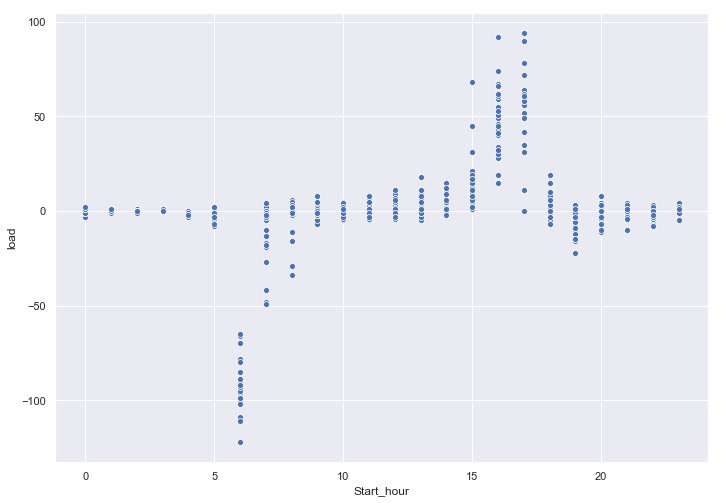

In [114]:
#station_load = sns.load_dataset("station_load")
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(11.7,8.27)})

l = sns.scatterplot(x = 'Start_hour',y = 'load',data=station_8_W31)

**NOTE:** The usage pattern suggests that the inflow and outflow patterns have an inverse relationship when observing morning peak hour and evening peak hour.

This also explains that commuters have common origin and destination points - such as Penn Station to work in the morning and back in the evening.

In [115]:
station_load['load'].describe()

count    279995.000000
mean          0.021383
std           5.314664
min        -124.000000
25%          -2.000000
50%           0.000000
75%           2.000000
max          96.000000
Name: load, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x1a36b9dba8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a36ba66a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a36bae400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a36ba6f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a36b9dd30>,
  <matplotlib.lines.Line2D at 0x1a36ba6240>]}

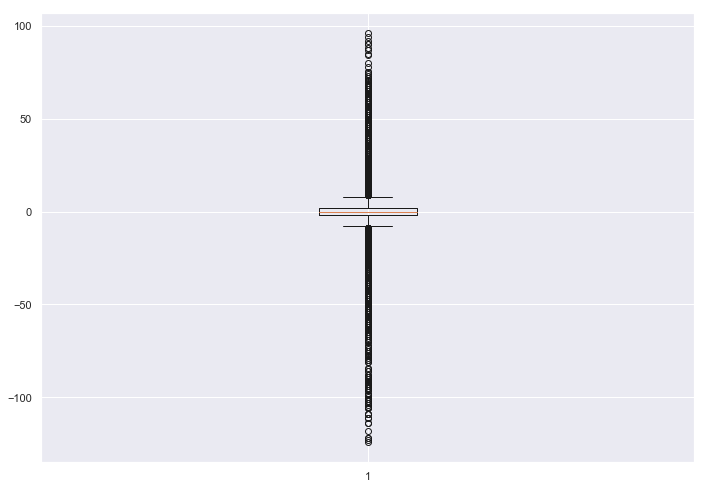

In [116]:
plt.boxplot(station_load['load'])

**Assuming Average number of docks in a station is close to 20. Keeping a buffer of +/- 10 bikes. **

We are interested in looking at cases where the outflow is much greater than inflow (highly -ve load). We have set a threshold of -30 and setting label to **Resource available**

We are also interested parallelly in observations with much larger inflow as compared to outflow (highly +ve load). We have set a threshold of +30 and setting label to **Resource not available**

In between - Class **Balanced**


In [117]:
def label_load(row):

    if row['inflow'] <= 2 and row['outflow'] <= 2:
        return 'idle'
    elif row['load'] <= -30:
        return 'high outflow'
#     elif -30 < row['load'] < -10:
#         return 'low outflow'
    elif -30 <= row['load'] < 0:
        return 'low outlow'
    elif 0 < row['load'] <= 30:
        return 'low inflow'
#     elif 10 < row['load'] <= 30 :
#         return 'low inflow'
    elif row['load'] > 30:
        return 'high inflow'
    else:
        return 'load balanced'

In [119]:
station_load['label'] = station_load.apply(lambda row: label_load(row),axis = 1)
labels = station_load.groupby('label')['load'].size()
labels

label
high inflow        417
high outflow       522
idle             69637
load balanced    19062
low inflow       96234
low outlow       94123
Name: load, dtype: int64

In [120]:
station_load = station_load[~station_load.label.isin(['high inflow', 'high outflow', 'load balanced'])]
station_load = station_load[~station_load.Start_Dayofweek.isin(['Saturday', 'Sunday'])] #Interested in weekday commuters

In [121]:
labels = station_load.groupby('label')['load'].size()
labels

label
idle          51219
low inflow    74664
low outlow    72366
Name: load, dtype: int64

In [ ]:
station_load.head()

In [ ]:
labels.plot(kind='bar')
labels

In [ ]:
station_load.head()

In [ ]:
station_load_cpy = pd.DataFrame(station_load)

## Selecting the features that are useful for model building

In [ ]:
station_load.drop(station_load.columns[[1,4,5,6,7,8,9]],axis=1,inplace=True)

station_load.head()

## Using Classification techniques to predict need for resources based on load.

In [ ]:
from sklearn.preprocessing import LabelEncoder#Creating dummy variables
# station_load = station_load.apply(LabelEncoder().fit_transform)
# station_load
# station_load
station_load = pd.get_dummies(station_load, columns=['Start_hour', 'Start_Dayofweek', 'origin_id'])
station_load

In [ ]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = station_load

# y is a vector, hence we use dot to access 'label'
y = station_load.label


In [ ]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
Y = station_load.pop('label')
#Creating a sparse matrix with current observations
X = station_load.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(multi_class='ovr',solver = 'newton-cg')

# fit model
logreg.fit(X_train, y_train)

In [ ]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
metrics.confusion_matrix(y_test, y_pred_class)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# make class predictions for the testing set
y_pred_class = clf.predict(X_test)

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

### SVM 

### Ensemble Methods

### Naive Bayes Methods

In [ ]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
from sklearn import metrics
print("Multinomial Naive Bayes:" ,metrics.accuracy_score(y_test, y_pred))

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random Forest:",accuracy_score(y_test, y_pred))

### 